1. READ DATA

In [124]:
import pandas as pd
import re

df= pd.read_csv('.\midterm-dataset\dataset\dataset_full.csv')
df.head()

,_,id,id_by_category,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,0,0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,1,1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,2,2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,3,3,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,4,4,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"


In [70]:
#In ra thông tin và thống kê mô tả của dữ liệu
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   _               551585 non-null  int64 
 1   id              551585 non-null  int64 
 2   id_by_category  551585 non-null  int64 
 3   name            551585 non-null  object
 4   main_category   551585 non-null  object
 5   sub_category    551585 non-null  object
 6   image           551585 non-null  object
 7   link            551585 non-null  object
 8   ratings         375791 non-null  object
 9   no_of_ratings   375791 non-null  object
 10  discount_price  490422 non-null  object
 11  actual_price    533772 non-null  object
dtypes: int64(3), object(9)
memory usage: 50.5+ MB
None
                   _             id  id_by_category
count  551585.000000  551585.000000   551585.000000
mean   275792.000000  275792.000000     7006.200471
std    159229.018453  159229.018453     5740.83

In [71]:
#In ra số lượng giá trị duy nhất của mỗi cột    
df.nunique()

_                 551585
id                551585
id_by_category     19200
name              396210
main_category         20
sub_category         112
image             462414
link              551585
ratings               49
no_of_ratings       8342
discount_price     27511
actual_price       23170
dtype: int64

2. CLEAN DATA

In [72]:
#Kiểm tra xem dữ liệu có giá trị thiếu không
print(df.isnull().values.any())
#Kiểm tra các giá trị bị thiếu trong mỗi cột
missing_values = df.isnull().sum().sum()
print(missing_values)

True
430564


Text(0.5, 1.0, 'NULL values heatmap')

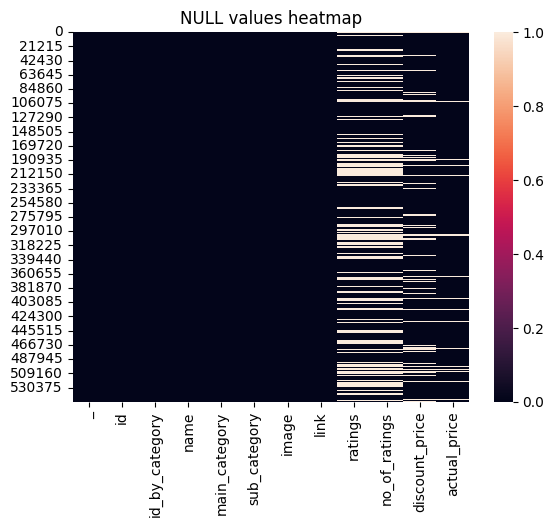

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=True)
plt.title("NULL values heatmap")


In [74]:
df.isnull().sum()

_                      0
id                     0
id_by_category         0
name                   0
main_category          0
sub_category           0
image                  0
link                   0
ratings           175794
no_of_ratings     175794
discount_price     61163
actual_price       17813
dtype: int64

In [125]:
# Kiểm trả giá trị của cột acutal_price và discount_price có bao nhiêu loại tiền tệ
def extract_currency(value):
    # Biểu thức chính quy để tìm ký hiệu tiền tệ
    match = re.search(r'[^\d.,\s]+', str(value))  # Ký tự không phải số, dấu phẩy, chấm hoặc khoảng trắng
    if match:
        return match.group(0)
    return None

currency = map(extract_currency, df['actual_price'] + df['discount_price'])
print(set(currency))  

{'₹', 'nan'}


In [127]:
# Xóa ký hiệu tiền tệ và dấu phân cách hàng nghìn, sau đó chuyển về kiểu float
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce').round(1)
df['no_of_ratings'] = pd.to_numeric(df['no_of_ratings'].str.replace(',', ''), errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'].str.replace('₹', '').str.replace(',', ''), errors='coerce')
df['discount_price'] = pd.to_numeric(df['discount_price'].str.replace('₹', '').str.replace(',', ''), errors='coerce')

In [129]:
print(set(df['no_of_ratings']))
#In min, max, range, biểu đồ phân phối của dữ liệu
#kiểm tra có giá trị âm hay không
#kiểm tra định dạng giá trị có đúng không, ví dụ: actual_price  : 2,91,541

{1.0, 2.0, 3.0, 4.0, 5.0, nan, 7.0, 8.0, 9.0, 10.0, 6.0, 12.0, 11.0, 14.0, 15.0, 16.0, 13.0, 17.0, 19.0, 18.0, 21.0, 22.0, 23.0, nan, 24.0, 26.0, 27.0, 20.0, 29.0, 25.0, 31.0, 32.0, 33.0, 34.0, 28.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, nan, 47.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 48.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 30.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0

: 

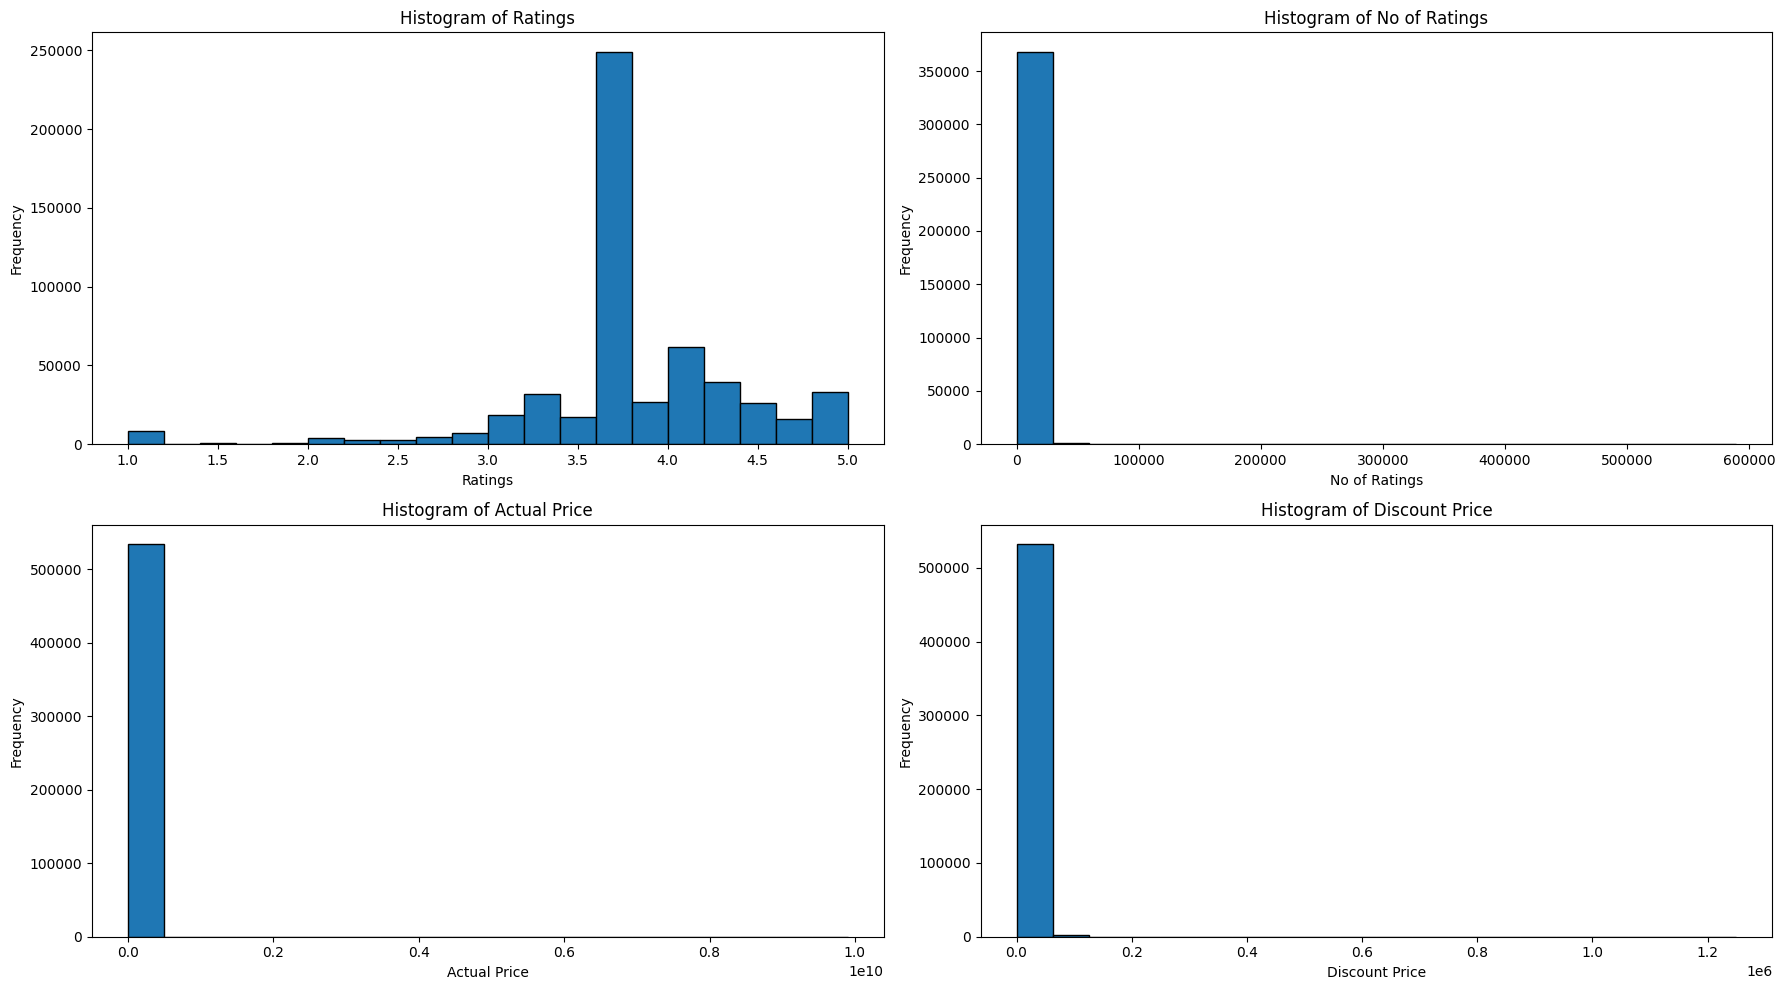

In [114]:
fig, axs = plt.subplots(2, 2, figsize=(18, 10))  

axs[0, 0].hist(df['ratings'].dropna(), bins=20, edgecolor='black')
axs[0, 0].set_title('Histogram of Ratings')
axs[0, 0].set_xlabel('Ratings')
axs[0, 0].set_ylabel('Frequency')

axs[0, 1].hist(df['no_of_ratings'].dropna(), bins=20, edgecolor='black')
axs[0, 1].set_title('Histogram of No of Ratings')
axs[0, 1].set_xlabel('No of Ratings')
axs[0, 1].set_ylabel('Frequency')

axs[1, 0].hist(df['actual_price'].dropna(), bins=20, edgecolor='black')
axs[1, 0].set_title('Histogram of Actual Price')
axs[1, 0].set_xlabel('Actual Price')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].hist(df['discount_price'].dropna(), bins=20, edgecolor='black')
axs[1, 1].set_title('Histogram of Discount Price')
axs[1, 1].set_xlabel('Discount Price')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
df['ratings'] = df['ratings'].fillna(df['ratings'].mean())

# Điền giá trị mặc định là 0 cho 'no_of_ratings' (vì không có đánh giá)
df['no_of_ratings'] = df['no_of_ratings'].fillna(0)
# Điền giá trị của 'actual_price' cho                                     'discount_price' nếu thiếu
df['discount_price'] = df['discount_price'].fillna(df['actual_price'])
# Điền giá trị mặc định 0 nếu không có giảm giá
df['discount_price'] = df['discount_price'].fillna(0)

In [ ]:
'''
note
no_of_ratings: 
    'Usually dispatched in 1 to 2 months.'
    'Usually dispatched in 4 to 5 weeks.'
    'Usually dispatched in 11 to 12 days.'
    'Only 3 left in stock.'
    
'''

In [86]:

print(df.iloc[100:110]['actual_price'])

100        NaN
101    55990.0
102    58990.0
103    78200.0
104    30520.0
105    72900.0
106     2999.0
107    42900.0
108    76900.0
109    49990.0
Name: actual_price, dtype: float64


In [77]:
# Xóa ký hiệu tiền tệ và dấu phân cách hàng nghìn, sau đó chuyển về kiểu float
df['actual_price'] = pd.to_numeric(df['actual_price'].str.replace('₹', '').str.replace(',', ''), errors='coerce')
df['discount_price'] = pd.to_numeric(df['discount_price'].str.replace('₹', '').str.replace(',', ''), errors='coerce')

# Xây dựng mô hình dự đoán actual_price dựa trên discount_price, no_of_ratings và ratings
from sklearn.linear_model import LinearRegression

# Lọc các hàng không bị thiếu 'actual_price'
non_missing_data = df.dropna(subset=['actual_price'])

# Xây dựng mô hình
model = LinearRegression()
features = ['discount_price', 'no_of_ratings', 'ratings']
model.fit(non_missing_data[features], non_missing_data['actual_price'])

# Dự đoán giá trị bị thiếu của actual_price
missing_data = df[df['actual_price'].isnull()]
predicted_prices = model.predict(missing_data[features])

# Điền các giá trị dự đoán cho actual_price
df.loc[df['actual_price'].isnull(), 'actual_price'] = predicted_prices


AttributeError: Can only use .str accessor with string values!

In [21]:
df.isnull().values.any()

# Kiểm tra số lượng giá trị thiếu trong mỗi cột
print(df.isnull().sum())


_                     0
id                    0
id_by_category        0
name                  0
main_category         0
sub_category          0
image                 0
link                  0
ratings               0
no_of_ratings         0
discount_price        0
actual_price      17813
dtype: int64


In [20]:
# Kiểm tra dữ liệu trùng lặp
duplicates = df.duplicated()
print(duplicates.sum())  # Số lượng bản ghi trùng lặp

# Loại bỏ các bản ghi trùng lặp
df_cleaned = df.drop_duplicates()


0


In [12]:
# Chuyển tất cả các giá trị trong cột 'category' về chữ thường
df['main_category'] = df['main_category'].str.lower()
# Chuyển đổi cột 'date' về định dạng datetime


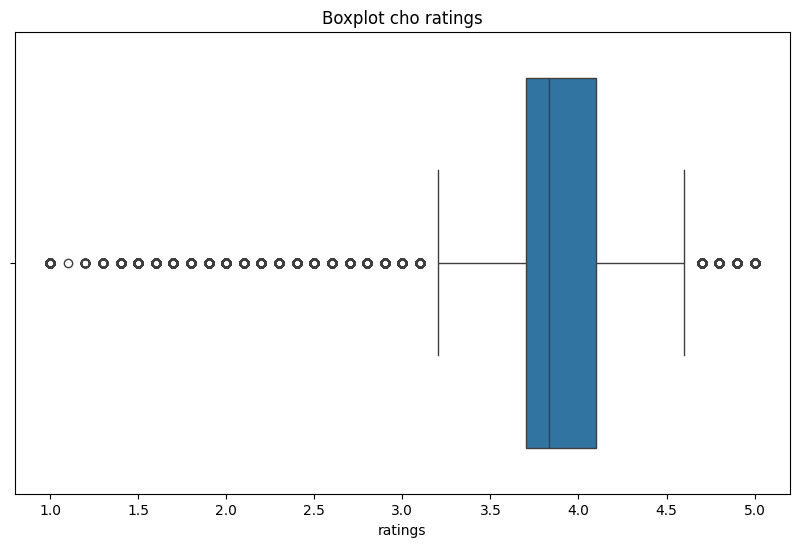

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ boxplot cho cột 'ratings'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['ratings'])
plt.title('Boxplot cho ratings')
plt.show()


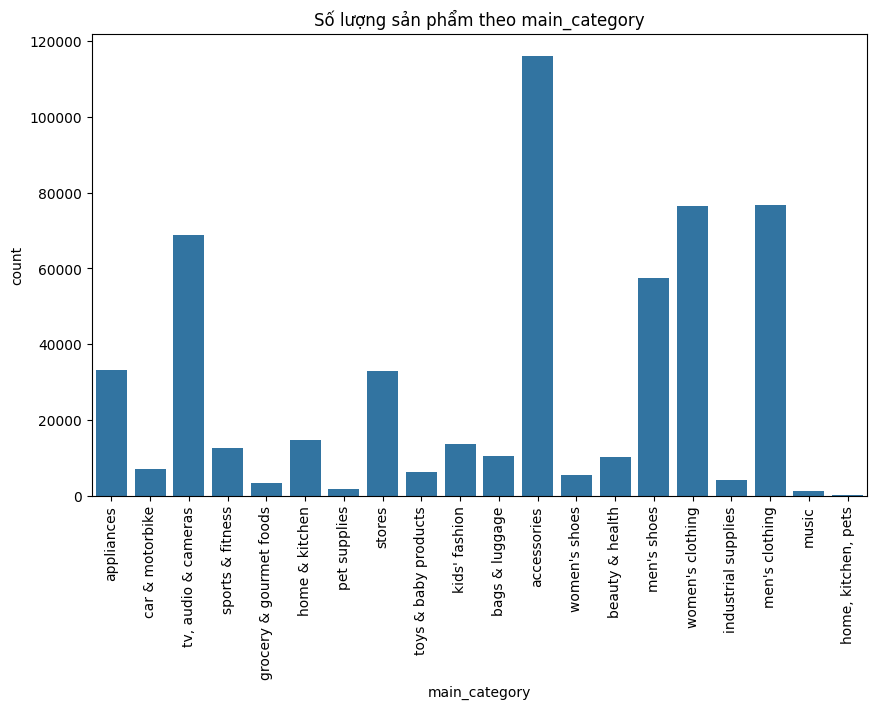

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Biểu đồ số lượng sản phẩm theo main_category
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='main_category')
plt.xticks(rotation=90)  # Xoay nhãn trên trục X để dễ đọc
plt.title('Số lượng sản phẩm theo main_category')
plt.show()
